# Model Evaluation / Comparison

In [1]:
# my virtual environments are rarely properly connected to jupyter so this fixes that. 
# you prolly won't need this cell but running it won't hurt anything either
import sys
import os
current_dir = os.getcwd()  # Get the current working directory
venv_dir = os.path.join(current_dir, 'venv') 
python_version = str(sys.version_info.major) + '.' + str(sys.version_info.minor)
site_packages_path = os.path.join(venv_dir, 'lib', 'python' + python_version, 'site-packages')
sys.path.append(site_packages_path) 

In [2]:
import torch
from model_comparison import  plot_column_from_csv, evaluate_models, format_model_output

In [3]:
models_to_compare = [
    'MM_1m'
]

### first up we'll look at loss curves
notice that even with a log scale I had to splice out the first 5% to make the lines distinct

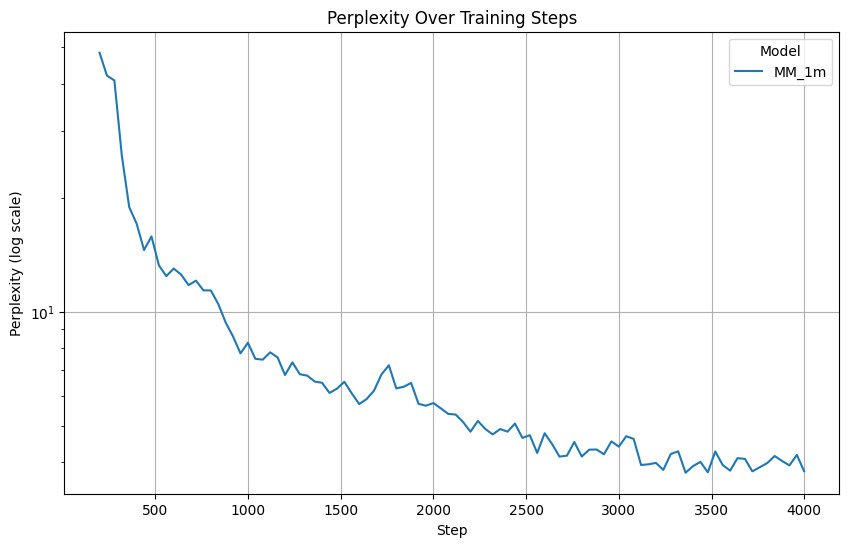

In [4]:
plot_column_from_csv(models_to_compare, 'Step', 'Perplexity', log_y=True, trim_percentage=5)

### now let's compare individual token accuracies
we'll compare topk teacher-forcing accuracies since these models really aren't good enough to be looking at actual inference output

In [5]:
topk = 5
results, correct_data = evaluate_models(models_to_compare, topk)

928.456K parameters
ModelConfig(dim=80, device='cpu', tokenizer='bpe_v1', vocab_len=8192, num_layers=4, second_resid_norm=False, num_heads=2, head_dim=40, max_seq_len=512, mm_bias=False, pmem_size=224, pmem_count=1, scale_first_resid=True, norm_type='RMSNorm', norm_affine=True, norm_bias=True, eps=1e-06)
Model(
  (token_embedder): Embedding(8195, 80)
  (layers): ModuleList(
    (0-3): 4 x Layer(
      (pre_context_norm): Norm()
      (context): ContextMem(
        (k_featurizer): KeyFeatureExtractor(
          (W_k): Linear(in_features=80, out_features=80, bias=False)
          (leaky_avg): LeakyAvg()
        )
        (v_featurizer): ValFeatureExtractor(
          (W_v): Linear(in_features=80, out_features=80, bias=False)
        )
        (c_proj): Linear(in_features=80, out_features=80, bias=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
        (attn_dropout): Dropout(p=0.1, inplace=False)
      )
      (pre_persistent_norm): Norm()
      (persistent): PersistentMem(

In [6]:
# Display the results for each model
for name, data in results.items():
    format_model_output(name, data, topk, data['tokenizer'], correct_data)

Model: MM_1m
  - Top-5 Accuracy: 73.24%
True	Predicted
Once	['Once', 'On', 'Lily', 'To', 'Ann']
 	['', ', ', '', 'Once', '. ']
upon	['upon', 'th', 'hi', 'da', '']
 	['', ', ', 'upon', '. ', '.\n']
a	['', 'an', 'ti', 'th', 'so']
 	['', ', ', '. ', '', '.\n']
ti	['ti', '', 'li', '', 'ni']
me	['me', '', 'ti', '', 'ce']
, 	[', ', '', '. ', '! ', 'me']
th	['th', 'in', '', 'me', 'on']
er	['er', 'il', 'ered', '', 'ic']
e	['', 'em', 'es', 'is', 'er']
 	['', ', ', '', '. ', "'s"]
was	['was', 'live', 'were', 'had', 'th']
 	['', 'was', ', ', '. ', '']
a	['', 'an', 'th', 'tw', 'ma']
 	['', ', ', '. ', ' 3', 'si']
bee	['li', 'big', 'sm', 'boy', 'gi']
 	['', '', 'tle', 'ne', '']
ca	['na', 'ca', 'li', 've', 'wh']
lle	['', '', 'refu', 'lle', '']
d	['', 'lly', '', 'lle', '']
 	['', '. ', ', ', '.\n', '! ']
Be	['to', 'and', 'Tim', 'na', 'wh']
ss	['', 'nt', '', 'ss', '']



# in the future it'd be cool to build out an automated GPT-4 rater like what they used in the TinyStories paper

# also once the hyperparameter search module is working i should build a system that performs a regression on the hyperparameters tested to predict teacher-forcing topk accuracy. likely need to include both linear, quadratic, & interaction terms in the regression and then do a lasso to remove useless terms